# Assignment A1 [35 marks]



The assignment consists of 4 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Linear Algebra [8 marks]

**1.1** Using the method of your choice, solve the linear system $Ax = b$ with

$$ A = \begin{pmatrix}
          1 &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{and} \qquad 
    b = \begin{pmatrix}
           5.2 \cr 0.1 \cr 1.9 \cr 0
        \end{pmatrix},
$$

and compute the residual norm $r = \|Ax-b\|_2$. Display the value of $r$ in a clear and easily readable manner.

**[2 marks]**

In [4]:
import numpy as np

def rnorm(A, b):
    # Use the inbuilt python function to solve for x
    x = np.linalg.solve(A, b)

    print(f'x =\n{x}')

    # Make a vector of the differences between Ax and b
    r_vector = np.matmul(A, x) - b
    print(f'Ax - b = \n {r_vector}.')

    # Sum the squares of the residual values
    r = 0
    for i in range(len(x)):
        r += r_vector[i]**2

    # Square root the sum
    r = r**(1/2)

    print(f'\n The residual norm of Ax-b is \n {r}. \n')


# Construct the matrices
A = np.array([[1, 1, 0, 1],[-1, 0, 1, 1], [0, -1, 0, -1], [1, 0, 1, 0]], dtype = float)

b = np.array([[5.2],[0.1],[1.9],[0]])

# Compute residual norm of Ax - b
rnorm(A, b)


x =
[[  7.1]
 [-16.2]
 [ -7.1]
 [ 14.3]]
Ax - b = 
 [[ 8.88178420e-16]
 [ 1.41553436e-15]
 [-3.10862447e-15]
 [-1.77635684e-15]].

 The residual norm of Ax-b is 
 [3.95115023e-15]. 



**1.2** Repeat the same calculations for the matrix

$$ A = \begin{pmatrix}
          a &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{with} \qquad a \in \{10^{-8}, 10^{-10}, 10^{-12}\}. 
$$

Display the value of $r$ for each value of $a$, and avoid repeating (copy+pasting) code.

**[3 marks]**

In [5]:
a_values = np.array([10**(-8), 10**(-10), 10**(-12)])

for n in range(len(a_values)):
    a = a_values[n]
    
    # Redefine A with variable a
    A = np.array([[a, 1, 0, 1],
                  [-1, 0, 1, 1], 
                  [0, -1, 0, -1], 
                  [1, 0, 1, 0]], dtype = float)
    
    print(f'When a = {a}')
    rnorm(A, b)

When a = 1e-08
x =
[[ 7.10000009e+08]
 [-1.42000002e+09]
 [-7.10000009e+08]
 [ 1.42000002e+09]]
Ax - b = 
 [[ 2.86102295e-07]
 [-9.53674316e-08]
 [-1.43051147e-07]
 [ 0.00000000e+00]].

 The residual norm of Ax-b is 
 [3.33786011e-07]. 

When a = 1e-10
x =
[[ 7.09999883e+10]
 [-1.41999977e+11]
 [-7.09999883e+10]
 [ 1.41999977e+11]]
Ax - b = 
 [[ 1.22070312e-05]
 [ 6.10351562e-06]
 [-6.10351562e-06]
 [ 0.00000000e+00]].

 The residual norm of Ax-b is 
 [1.49504989e-05]. 

When a = 1e-12
x =
[[ 7.09873784e+12]
 [-1.41974757e+13]
 [-7.09873784e+12]
 [ 1.41974757e+13]]
Ax - b = 
 [[ 0.00117187]
 [-0.00039063]
 [-0.0015625 ]
 [ 0.        ]].

 The residual norm of Ax-b is 
 [0.0019918]. 



**1.3** Summarise and explain your observations in a discussion of no more than $250$ words.

**[3 marks]**



📝 **When python stores a floating point value it stores it in binary but most decimal values cannot be exactly represented as such and so have to be rounded. In order for python or numpy to do operations with the values they must be stored and therefore the calculations are conducted with rounded values thus when recalculating the original value some error is introduced.**

**The order of error values is inversely proportional to the order of the a value.
The closer to 0 a gets the greater the error in calculations of x from A and b and b from A and x compared with the actual values.
You lose precision when a gets too small as you're dealing with much larger x values and smaller values of a so the rounding error has a greater impact over all the calculations.**

Reference
https://docs.python.org/3/tutorial/floatingpoint.html

---
## Question 2: Sums [10 marks]

Consider the sum

$$
S_N = \sum_{n=1}^N \frac{2n+1}{n^2(n+1)^2}.
$$

**2.1** Write a function `sum_S()` which takes 2 input arguments, a positive integer `N` and a string `direction`, and computes the sum $S_N$ **iteratively** (i.e. using a loop):
- in the direction of increasing $n$ if `direction` is `'up'`,
- in the direction of decreasing $n$ if `direction` is `'down'`.

For instance, to calculate $S_{10}$ in the direction of decreasing $n$, you would call your function using `sum_S(10, 'down')`.

**[3 marks]**

In [6]:
# Let f be the function of n within the sumation above
def f1(n):
    f_n = (2*n + 1)/(n*(n + 1))**2
    
    return f_n

def sum_S(N, direction):
    s = 0
    
    if direction == 'up':
    # Add up f(n) for increasing n values starting at n = 1
    
        for k in range(N):
            s += f1(k + 1)
        
    elif direction == 'down':
    # Add up f1(n) for decreasing n values starting at n = N
    
        for k in range(N, 0, -1):
            s += f1(k)
        
    return s

''' 
For the down summation I used range(N, 0, -1) with f1(k), instead of range(N) with f(N - k), 
so as not to introduce more error from the N - k calculation. 
'''

' \nFor the down summation I used range(N, 0, -1) with f1(k), instead of range(N) with f(N - k), \nso as not to introduce more error from the N - k calculation. \n'

**2.2** The sum $S_N$ has the closed-form expression $S_N = 1-\frac{1}{(N+1)^2}$. We assume that we can compute $S_N$ using this expression without significant loss of precision, i.e. that we can use this expression to obtain a "ground truth" value for $S_N$.

Using your function `sum_S()`, compute $S_N$ iteratively in both directions, for 10 different values of $N$, linearly spaced, between $10^3$ and $10^6$ (inclusive).

For each value of $N$, compare the results in each direction with the closed-form expression. Present your results graphically, in a clear and understandable manner.

**[4 marks]**

Sum up yeilds errors of 
 [5.55111512e-16 9.99200722e-15 1.66755498e-13 1.59894320e-12
 2.31525910e-12 4.13025170e-12 5.11735099e-12 5.71298564e-12
 6.09978734e-12 6.36513064e-12].
Sum down yeilds errors of 
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.11022302e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00].


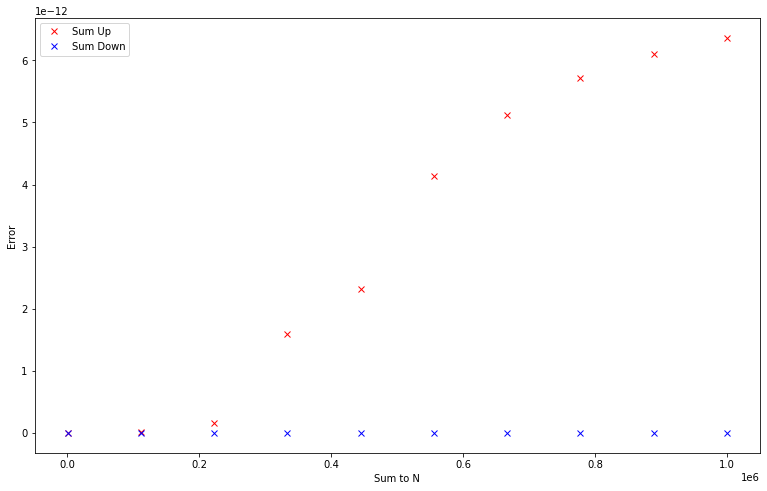

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Closed-form sum of f(n) from 1 to N
def closed(N):
    g_N = 1 - 1/(N + 1)**2
    return g_N


# Plot errors for up and down summations over a range of values of N
n1 = np.linspace(10**3, 10**6, 10, dtype = int)
n2 = n1

y_up = np.empty(n1.shape)
y_down = np.empty(n2.shape)

for i in range(len(n1)):
    up_diff = sum_S(n1[i], 'up') - closed(n1[i])
    down_diff = sum_S(n2[i], 'down') - closed(n2[i])
    
    value_up = abs(up_diff)
    value_down = abs(down_diff)    
    y_up[i] = value_up
    y_down[i] = value_down

print(f'Sum up yeilds errors of \n {y_up}.')
print(f'Sum down yeilds errors of \n {y_down}.')

fig, ax = plt.subplots(1, 1, figsize = (13, 8))
ax.plot(n1, y_up, 'rx', label = 'Sum Up')
ax.plot(n2, y_down, 'bx', label = 'Sum Down')
# Plot corresponding N and error values on the first subplot

ax.set_ylabel('Error')
ax.set_xlabel('Sum to N')
ax.legend()

plt.show()


**2.3** Describe and explain your findings in no more that $250$ words. Which direction of summation provides the more accurate result? Why?

**[3 marks]**

📝 **The calculations involved in computing the up and down functions are the same so it must be the memory in the initial stored value for s from the first iteration. As $ \frac{2n+1}{n^2(n+1)^2}$ for N = 1 requires less memory than for N = $10^3$ or $10^6$ so rounding occurs for each successive value that is added to the variable s so as N increases the error increases.** 

**Computing from largest to smallest values almost no precision is lost as the memory allocated to s is large enough for the addition of subsequent smaller values.**



---
## Question 3: Numerical Integration [10 marks]

For integer $k \neq 0$ consider the integral 

$$
I(k) = \int_0^{2\pi}  x^4 \cos{k x} \ dx = \frac{32\pi^3}{k^2} - \frac{48\pi}{k^4} \ .
$$

**3.1** Write a function `simpson_I()` which takes 2 input arguments, `k` and `N`, and implements Simpson's rule to compute and return an approximation of $I(k)$, partitioning the interval $[0, 2\pi]$ into $N$ sub-intervals of equal width.

**[2 marks]**

In [8]:
import numpy as np

# f2 is the function being integrated
def f2(x, k):
    f = x**4*np.cos(k*x)
    return f

def simpson_I(k, N):
    # Find the x values at the beginning, end and midpoint of each of N subintervals
    x = np.linspace(0, 2*np.pi, 2*N + 1)
  
    # Use composite Simpson's rule weighting the midpoint 4 times the endpoints of each subinterval
    h = 2*np.pi/(2*N)
    sum_I = (h/3)*sum(f2(x[0:-1:2], k) + 4*f2(x[1::2], k) + f2(x[2::2], k))
    
    return sum_I

**3.2** For $k = 1$, and for $\varepsilon \in \{10^{-n} \ |\  n \in \mathbb{N}, 3 \leqslant n \leqslant 8\}$, determine the number $N_{\text{min}}$ of partitions needed to get the value of the integral $I(1)$ correctly to within $\varepsilon$. 

**[2 marks]**

In [9]:
# A function to generate the specified epsilon values for base 10 and base 2
def e_values(a, n0, n1):
    epsilon = np.zeros(abs(n1 - n0) + 1)
    for n in range(abs(n1 - n0) + 1):
        epsilon[n] = a**(n0 - n)
    return epsilon

# A function against which to check the approximation    
def actual_I(k): 
    I = (32*np.pi**3/k**2) - (48*np.pi/k**4)
    return I

# The error between the approximation and actual value
def abs_err(k, N):
    return abs(simpson_I(k, N) - actual_I(k))

# Find the minimum N such that the error is less than epsilon small for range of k
def minimum_N(epsilon, k):
    N = 1
    
    # If only 1 epsilon is given len(epsilon) is not defined so check this case
    if epsilon.shape == (1,):
        while abs_err(k, N) > epsilon:
            N = N + 1
        min_N = N

    else:
        min_N = np.empty(len(epsilon))
        
        # Find N for each epsilon in the list
        for i in range(len(epsilon)):
                while abs_err(k, N) > epsilon[i]:
                    N = N + 1
                min_N[i] = N
    return min_N

epsilon1 = e_values(10, -3, -8)

# Output an example for one value of k
min_N1 = minimum_N(epsilon1, 1)
print(f' List of epsilon is {epsilon1},\n and list of N_min for k = 1 is {min_N1}.')


 List of epsilon is [1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08],
 and list of N_min for k = 1 is [ 36.  63. 112. 198. 352. 626.].


**3.3** Repeat your calculations from **3.2** for $k \in \{2^{n}\ |\ n \in \mathbb{N}, n \leqslant 6\}$. 

**[2 marks]**

In [10]:
# Generate specified epsilon values
epsilon2 = e_values(2, -1, -6)

min_N2 = minimum_N(epsilon2, 1)
print(f' List of epsilon is {epsilon2},\n and list of N_min for k = 1 is {min_N2}.')



 List of epsilon is [0.5      0.25     0.125    0.0625   0.03125  0.015625],
 and list of N_min for k = 1 is [ 8.  9. 11. 13. 15. 18.].


**3.3** Present your results graphically by plotting 

(a) the number of terms $N_{\text{min}}$ against $\varepsilon$ for fixed $k$, 

(b) the number of terms $N_{\text{min}}$ against $k$ for fixed $\varepsilon$.

You should format the plots so that the data presentation is clear and easy to understand.

**[2 marks]**

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 626.  894. 1096. 1267. 1416. 1552. 1676. 1792. 1901. 2004. 2102. 2195.
 2285. 2371. 2454.]


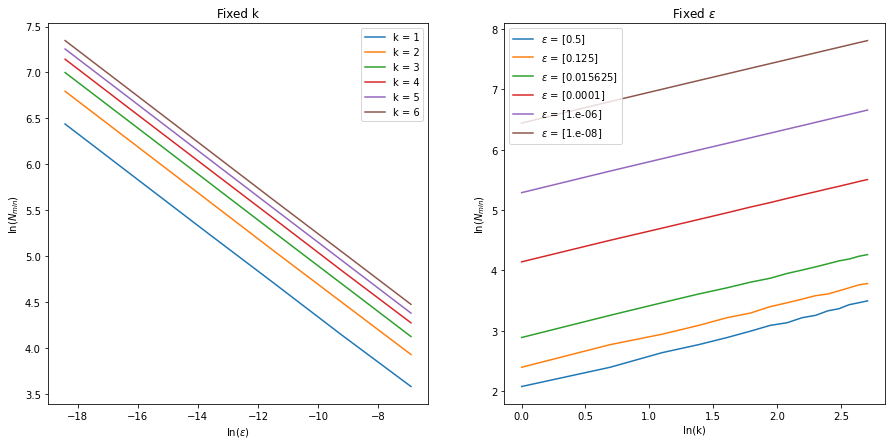

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (15, 7))

# Plot epsilon against minimum N for fixed integer k values 1 to 7
for k in range(1, 7):
    epsilon1 = e_values(10, -3, -8)
    min_N1 = minimum_N(epsilon1, k)

    epsilon2 = e_values(2, -1, -6)
    min_N2 = minimum_N(epsilon2, k)
    
    # Join epsilon arrays to one list and the minimum Ns to another to be plotted under one label
    np.append(epsilon1, epsilon2) 
    np.append(min_N1, min_N2)
    
    # Take the double log of the variables to plot straight lines that more clearly show all line plots
    ax[0].plot(np.log(epsilon1), np.log(min_N1), label = f'k = {k}')

ax[0].set_title('Fixed k')
ax[0].set_ylabel(r'ln($N_{min}$)')
ax[0].set_xlabel(r'ln($\epsilon$)')

ax[0].set_ylabel(r'ln($N_{min}$)')
ax[0].set_xlabel(r'ln($\epsilon$)')
ax[0].legend()


# Plot the k values against the minimum N for each epsilon value
k_values = np.arange(1, 16, 1)

# Take 6 of 12 epsilon values so the graph isn't too crowded
e_list = [2**(-1), 2**(-3), 2**(-6), 10**(-4), 10**(-6), 10**(-8)]

for e in range(6):
    min_N = np.empty(15)
    
    # Take each epsilon in turn
    eps = np.array([e_list[e]])

    for k in range(15):
        min_N[k] = minimum_N(eps, k + 1)

    # Plot the double log graph of these variables to distinguish between different e value plots
    ax[1].plot(np.log(k_values), np.log(min_N), label = r'$\epsilon$ = ' f'{eps}')
    
print(k_values)
print(min_N)


ax[1].set_title(r'Fixed $\epsilon$')
ax[1].set_ylabel(r'ln($N_{min}$)')
ax[1].set_xlabel(r'ln(k)')

ax[1].set_ylabel(r'ln($N_{min}$)')
ax[1].set_xlabel(r'ln(k)')
ax[1].legend()

    
plt.show()


**3.4** Discuss, with reference to your plot from 3.3, your results. Your answer should be no more than $250$ words.

**[2 marks]**

📝 **For fixed k the general trend is decreasing as epsilon increases as a larger N is needed for greater accuracy or smaller error. 
As k increases for a fixed epsilon a higher n is needed for the same accuracy due to the increase in frequency of oscillations of the graph on the interval. This causes greater variation in f(x) for similar x values.**


---
## Question 4: Numerical Derivatives [7 marks]

Derivatives can be approximated by finite differences in several ways, for instance

\begin{align*}
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x)}{h} \\
        \frac{df}{dx} & \approx \frac{f(x) - f(x-h)}{h}  \\
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x-h)}{2h} \ . 
\end{align*}

Assuming $f$ to be differentiable, in the limit $h \to 0$, all three expressions are equivalent and exact, but for finite $h$ there are differences. Further discrepancies also arise when using finite precision arithmetic.

**4.1**
Estimate numerically the derivative of $f(x) = \cos(x)$ at $x = 1$ using the three expressions given above and different step sizes $h$. Use at least 50 logarithmically spaced values $h \in [10^{-16}, 10^{-1}]$.

**[2 marks]**

In [12]:
import numpy as np
def f3(x):
    return np.cos(x)
def df3(x):
    return -np.sin(x)

# Defining function for the forward, backward and centered difference equations 
# and then their errors with the values of the actual derivative
def d_forward(x, h):
    d = (f3(x + h) - f3(x))/h
    return d
def fdiff(x, h):
    diff = abs(d_forward(x, h) - df3(x))
    return diff


def d_backward(x, h):
    d = (f3(x) - f3(x - h))/h
    return d
def bdiff(x, h):
    diff = abs(d_backward(x, h) - df3(x))
    return diff


def d_centre(x, h):
    d = (f3(x + h) - f3(x - h))/(2*h)
    return d
def cdiff(x, h):
    diff = abs(d_centre(x, h) - df3(x))
    return diff
    
# Making the lists of the variables of the values of each approximation for increasing h
x = 1
h = np.logspace(-16, -1, 100)

yf = d_forward(x, h)

yb = d_backward(x, h)

yc = d_centre(x, h)

print(f'for x = 1 the forward difference equation gives \n {yf[1:5]}..., \n the backwards gives \n {yb[1:5]}, \n and the centered gives \n {yc[1:5]}, \n for h from 0.1 to 1e-16.')

for x = 1 the forward difference equation gives 
 [-1.56648079 -1.10512123 -0.77964118 -0.82503216]..., 
 the backwards gives 
 [-0.7832404  -1.10512123 -1.16946177 -0.82503216], 
 and the centered gives 
 [-1.17486059 -1.10512123 -0.97455148 -0.82503216], 
 for h from 0.1 to 1e-16.


**4.2**
Display the absolute difference between the numerical results and the
exact value of the derivative, against $h$ in a doubly logarithmic plot. 
You should format the plot so that the data presentation is clear and easy to understand.

**[2 marks]**

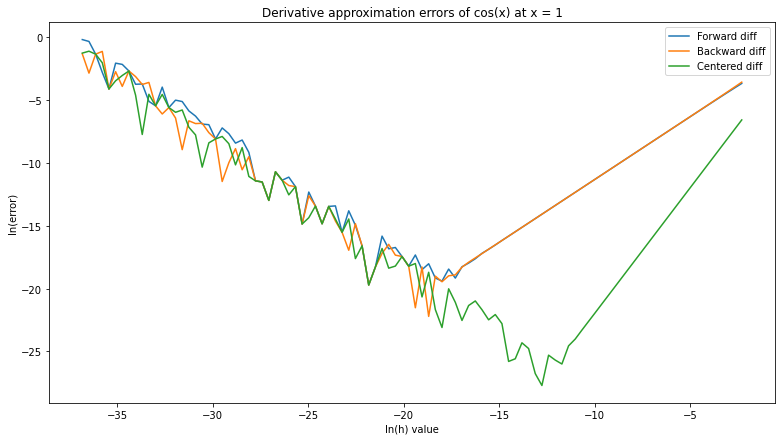

In [13]:
import matplotlib.pyplot as plt
# Making the lists of the variables of the errors to plot against h
f_err = fdiff(x, h)

b_err = bdiff(x, h)

c_err = cdiff(x, h)

# Plot the double logarithm graphs of h against the error
fig, ax = plt.subplots(figsize = (13, 7))
ax.plot(np.log(h), np.log(f_err), label = 'Forward diff' )
ax.plot(np.log(h), np.log(b_err), label = 'Backward diff')
ax.plot(np.log(h), np.log(c_err), label = 'Centered diff')

ax.set_title('Derivative approximation errors of cos(x) at x = 1')
ax.set_xlabel('ln(h) value')
ax.set_ylabel('ln(error)')
ax.legend()

**4.3**
Describe and interpret your results in no more than 250 words.

*Hint: run the code below.*

**[3 marks]**

In [14]:
h = 1e-14
print(1 + h - 1)
print((1 + h - 1)/h)

9.992007221626409e-15
0.9992007221626409


📝 **There are two main errors at play here, the error from approximating a derivative on a scale where the graph segment doesn't even appear linear so we take h smaller to counteract this error.**

**However when h gets small enough this error is outweighed by the rounding error involved when python has to store a very small number in order to calculate with it. This error is counteracted by taking a larger h.**

**So this is why the trend is decreasing for small h then increasing after a certain optimum value than minimises both errors.**
